In [1]:
# First load the dataset
import pandas as pd

def reporting_data():
    return pd.read_csv("Documents/Python/WHO-COVID-19-global-data.csv", sep=",")

dataset = reporting_data()

In [2]:
dataset.head() # See some info

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71563 entries, 0 to 71562
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date_reported       71563 non-null  object
 1    Country_code       71259 non-null  object
 2    Country            71563 non-null  object
 3    WHO_region         71563 non-null  object
 4    New_cases          71563 non-null  int64 
 5    Cumulative_cases   71563 non-null  int64 
 6    New_deaths         71563 non-null  int64 
 7    Cumulative_deaths  71563 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 4.4+ MB


In [4]:
dataset.describe() # Stadistic describe info

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,71563.000000,7.156300e+04,71563.000000,71563.000000
mean,645.112446,5.172074e+04,16.717605,1848.736554
std,4234.252425,3.750826e+05,108.135502,11225.193499
min,-8261.000000,0.000000e+00,-514.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,1.000000,2.750000e+02,0.000000,5.000000
75%,79.000000,6.550500e+03,1.000000,120.000000
max,99356.000000,9.032465e+06,6409.000000,228998.000000


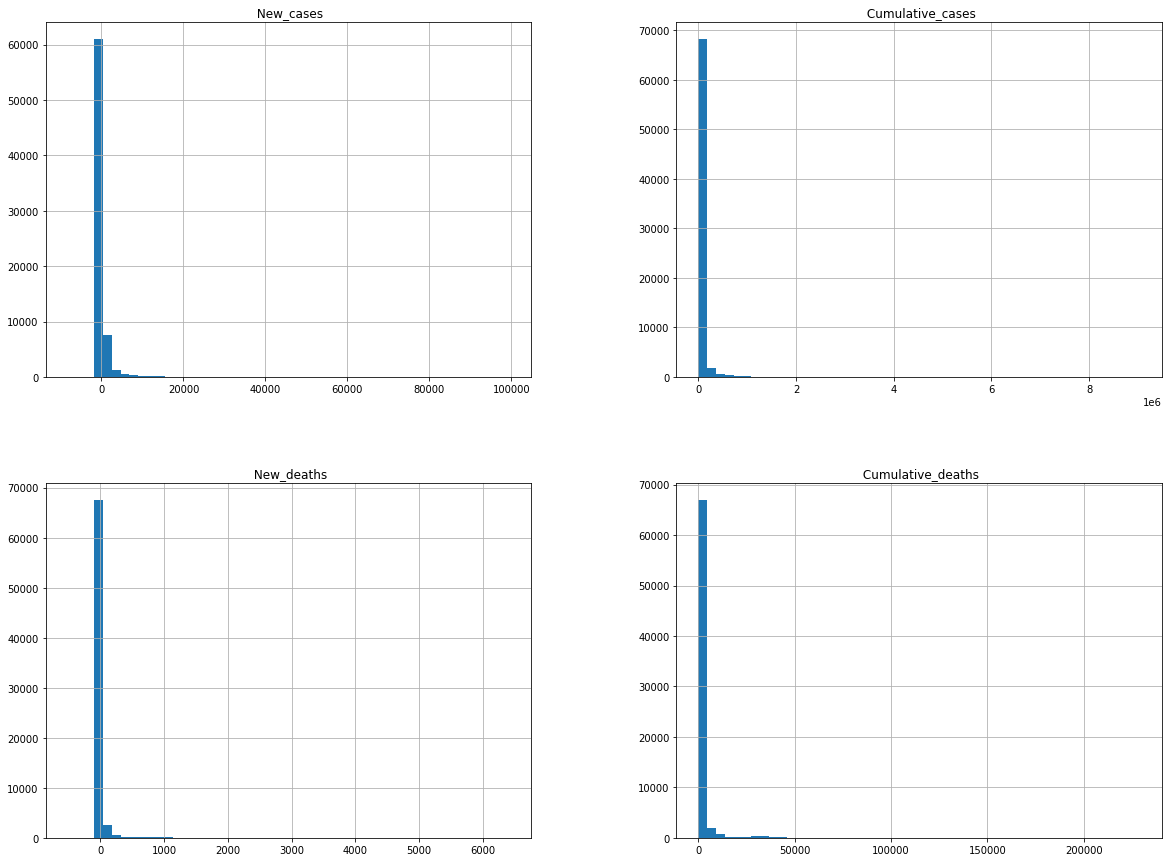

In [5]:
import matplotlib.pyplot as plt  # import a plot lib
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
# Discretize the columns

x1=dataset.iloc[:,4]  # ColumN : New_cases
x2=dataset.iloc[:,5]  # ColumN : Cumulative_cases
x3=dataset.iloc[:,6]  # ColumN : New_deaths
x4=dataset.iloc[:,7]  # ColumN : Cumulative_deaths

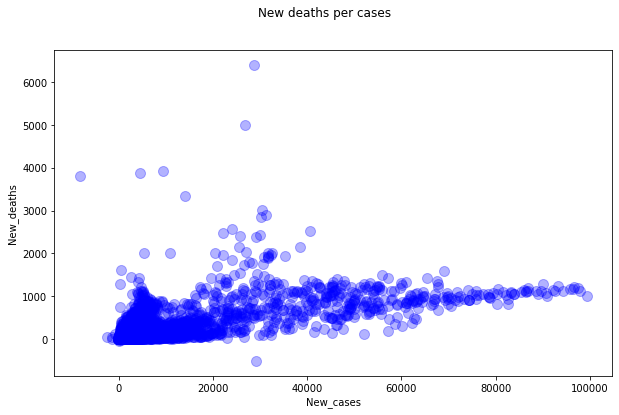

In [7]:
# Visualize the data
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('New deaths per cases')
# Create the Scatter Plot
ax.scatter(x1, x3, 
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.3,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots
plt.ylabel('New_deaths')
plt.xlabel('New_cases')
# Show the plot
plt.show()

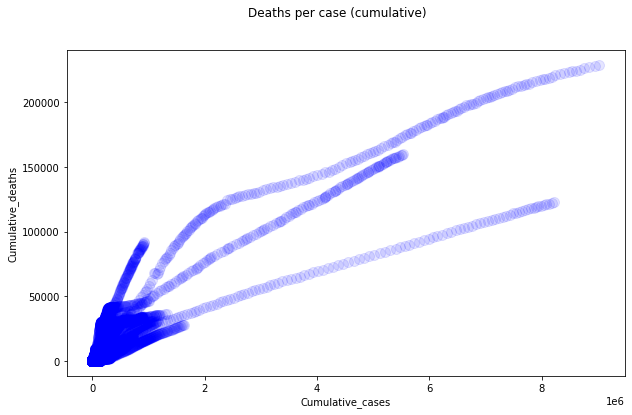

In [8]:
# Visualize the data
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Deaths per case (cumulative)')
# Create the Scatter Plot
ax.scatter(x2, x4, 
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.1,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots
plt.ylabel('Cumulative_deaths')
plt.xlabel('Cumulative_cases')
# Show the plot
plt.show()

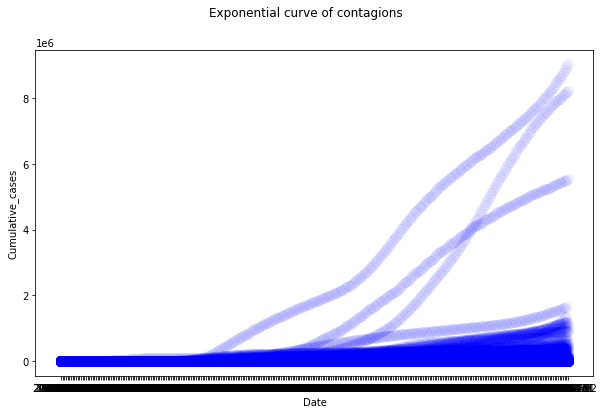

In [9]:
y1=dataset.iloc[:,0] 

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Exponential curve of contagions')
# Create the Scatter Plot
ax.scatter(y1, x2, 
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.05,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots
plt.ylabel('Cumulative_cases')
plt.xlabel('Date')
# Show the plot
plt.show()

In [10]:
# Correlations in the dataset 
corr_matrix = dataset.corr()   # Pearson'r
dataset.corr()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
New_cases,1.000000,0.844731,0.724693,0.775768
Cumulative_cases,0.844731,1.000000,0.585903,0.910560
New_deaths,0.724693,0.585903,1.000000,0.641807
Cumulative_deaths,0.775768,0.910560,0.641807,1.000000


In [11]:
# Convolution in the dataset 
dataset.cov()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
New_cases,1.792889e+07,1.341597e+09,3.318175e+05,3.687247e+07
Cumulative_cases,1.341597e+09,1.406870e+11,2.376407e+07,3.833798e+09
New_deaths,3.318175e+05,2.376407e+07,1.169329e+04,7.790519e+05
Cumulative_deaths,3.687247e+07,3.833798e+09,7.790519e+05,1.260050e+08


In [12]:
#Pearson's Correlation test (x1 - x2)
from scipy.stats import pearsonr

stat, p = pearsonr(x1, x2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.845, p=0.000
Probably dependent


In [13]:
#Pearson's Correlation test (x1 - x3)
from scipy.stats import pearsonr

stat, p = pearsonr(x1,x3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.725, p=0.000
Probably dependent


In [14]:
#Pearson's Correlation test (x1 - x4)
from scipy.stats import pearsonr

stat, p = pearsonr(x1,x4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.776, p=0.000
Probably dependent


In [15]:
#Pearson's Correlation test (x2 - x3)
from scipy.stats import pearsonr

stat, p = pearsonr(x2,x3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.586, p=0.000
Probably dependent


In [16]:
#Pearson's Correlation test (x2 - x4)
from scipy.stats import pearsonr

stat, p = pearsonr(x2, x4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.911, p=0.000
Probably dependent


In [17]:
#Tests whether the distributions of two independent samples are equal or not.

#Mann-Whitney U Test (x2 - x4)
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(x2,x4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=1685185585.000, p=0.000
Probably different distributions
